In [19]:
import pymongo
import math 
# import re
import pandas as pd
import numpy as np
import pylab 
from matplotlib import pyplot as plt
# from scipy import stats 
from  qgrid import show_grid as show 
from datetime import datetime

import seaborn as sns
import re
import matplotlib as mpl 
%matplotlib inline
mpl.style.use('ggplot')


def getRAPLDATA(alldata):
    rapl=alldata
    # rapl=alldata.loc[alldata["target"]=="rapl"]
    rapl["m"]=rapl.metadata.apply(lambda row:row["socket"]+" "+row["event"])
#     rapl["ind"]=rapl.apply(lambda row:row["timestamp"]+"_"+row["sensor"])
    rapl=rapl.pivot(index="timestamp",columns="m",values="power")
    rapl["tt"]=rapl.index
    rapl=rapl.rename(columns={"0 RAPL_ENERGY_DRAM":"dram 0","1 RAPL_ENERGY_DRAM":"dram 1","0 RAPL_ENERGY_PKG":"cpu 0","1 RAPL_ENERGY_PKG":"cpu 1"})
    rapl["sensor"]=alldata["sensor"][0]
    return rapl


def getTimes(machinename): 
  
    x=pd.DataFrame(list(db["rapl"+machinename].find({"target":{"$nin":["all","zmartwatts-sensor"]}},projection=["target","timestamp"])))
    times=pd.DataFrame()
    times["begin"]=x.groupby("target")["timestamp"].min()
    times["end"]=x.groupby("target")["timestamp"].max()
#     times["name"]=times.index
#     times[["mode","mode2","benchmark","class","cpu number","p","number"]]=times["name"].str.split("_",expand=True)
#     times["number"]=times.apply(lambda row:int(row["p"]) if row["number"]==None else int(row["number"]),axis=1)
    times["sensor"]=machinename
    return times

In [20]:
serveraddr = '172.16.45.8'
serverport=27017
db = pymongo.MongoClient(serveraddr, serverport)["variation"]
machines=["runningmodesxDahu25","runningmodesxDahu2","allmodesxDahu11xn2","allmodesxDahu15x2","sleep60xDahu11","rebootxDahu10" ]
rapls=[]
times=[]
energies=[]

In [9]:
   
i=""
x=pd.DataFrame(list(db["power"+i].find()))
x=getRAPLDATA(x)
y=getTimes(i) 
z=y
z[["cpu 0","cpu 1","dram 0","dram 1"]]=z.apply(lambda row:x.loc[np.logical_and(np.logical_and(row["end"]>=x["tt"],x["tt"]>= row["begin"]),x["sensor"]==row["sensor"]),["cpu 0","cpu 1","dram 0","dram 1"]].apply(np.trapz),axis=1)
z["cpu"]=z.apply(lambda row : row["cpu 1"]+row["cpu 0"],axis=1 )
z["dram"]=z.apply(lambda row : row["dram 1"]+row["dram 0"],axis=1 )
energies.append(z.copy())

KeyboardInterrupt: 

In [17]:
n=4
i=machines[n]
x=pd.DataFrame(list(db["power"+i].find()))
x=getRAPLDATA(x)
y=getTimes(i) 
# z=y
# z[["cpu 0","cpu 1","dram 0","dram 1"]]=z.apply(lambda row:x.loc[np.logical_and(np.logical_and(row["end"]>=x["tt"],x["tt"]>= row["begin"]),x["sensor"]==row["sensor"]),["cpu 0","cpu 1","dram 0","dram 1"]].apply(np.trapz),axis=1)
# z["cpu"]=z.apply(lambda row : row["cpu 1"]+row["cpu 0"],axis=1 )
# z["dram"]=z.apply(lambda row : row["dram 1"]+row["dram 0"],axis=1 )


In [18]:
show(x)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [21]:
# n=2
# i=machines[n]
# x=pd.DataFrame(list(db["power"+i].find()))
# x=getRAPLDATA(x)
# y=getTimes(i) 
# z=y
# z[["cpu 0","cpu 1","dram 0","dram 1"]]=z.apply(lambda row:x.loc[np.logical_and(np.logical_and(row["end"]>=x["tt"],x["tt"]>= row["begin"]),x["sensor"]==row["sensor"]),["cpu 0","cpu 1","dram 0","dram 1"]].apply(np.trapz),axis=1)
# z["cpu"]=z.apply(lambda row : row["cpu 1"]+row["cpu 0"],axis=1 )
# z["dram"]=z.apply(lambda row : row["dram 1"]+row["dram 0"],axis=1 )
# rapls.append()

rapls=[ pd.DataFrame(list(db["power"+i].find())) for i in machines]
rapls=[getRAPLDATA(i)for i in rapls]
times=[getTimes(i)for i in machines]
alldata=pd.concat(rapls)
rapl=pd.concat(rapls)
time=pd.concat(times)
# x.to_csv("dockervsbin.csv",sep=";")

In [23]:

energy=time
energy[["cpu 0","cpu 1","dram 0","dram 1"]]=time.apply(lambda row:rapl.loc[np.logical_and(np.logical_and(row["end"]>=rapl["tt"],rapl["tt"]>= row["begin"]),rapl["sensor"]==row["sensor"]),["cpu 0","cpu 1","dram 0","dram 1"]].apply(np.trapz),axis=1)
energy["cpu"]=energy.apply(lambda row : row["cpu 1"]+row["cpu 0"],axis=1 )
energy["dram"]=energy.apply(lambda row : row["dram 1"]+row["dram 0"],axis=1 )
# energy["name"]=energy.index
# energy[["mode","mode2","benchmark","class","cpu number","p","number"]]=energy["name"].str.split("_",expand=True)
# energy["number"]=times.apply(lambda row:int(row["p"]) if row["number"]==None else int(row["number"]),axis=1)
#     times["sensor"]=x["sensor"][0]
    
# energy["number"]=energy["number"].apply(lambda row:int(row))
# energy=energy.drop("tt",axis=1)
# row=times.iloc[0]
# row
# rapl.loc[np.logical_and(rapl["tt"]>= row["begin"],rapl["tt"]<=row["end"] )].sum()
# print(np.logical_and([True,True ,False]))
show(energy)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [34]:
energy.to_csv("runningtest.csv")

In [33]:
energy["name"]=energy.index
energy[["mode","mode2","benchmark","class","cpu number","p","number"]]=energy["name"].str.split("_",expand=True)
energy["number"]=energy.apply(lambda row:int(row["p"]) if row["number"]==None else int(row["number"]),axis=1) #times["sensor"]=x["sensor"][0]
    
energy["number"]=energy["number"].apply(int)
# energy=energy.drop("tt",axis=1)
show(energy)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [65]:
energy2= energy.copy()

In [67]:
energy2["mode2"]=energy2.apply(lambda row:"sleep"if row["mode"]=="sleep" else row["mode2"] ,axis=1)
energy2["mode"]=energy2.apply(lambda row:"normal"if row["mode"]=="sleep" else row["mode"] ,axis=1)
energy2=energy2.loc[energy2["mode2"]!="cacheclean"]
energy2=energy2.loc[energy2["sensor"]!="rebootxDahu10"]
energy2.to_csv("runningtestcleaned.csv")

In [64]:
show(energy2)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [68]:
energylu=energy2.loc[energy2["benchmark"]=="LU"]

In [70]:
energycg=energy2.loc[energy2["benchmark"]=="CG"]

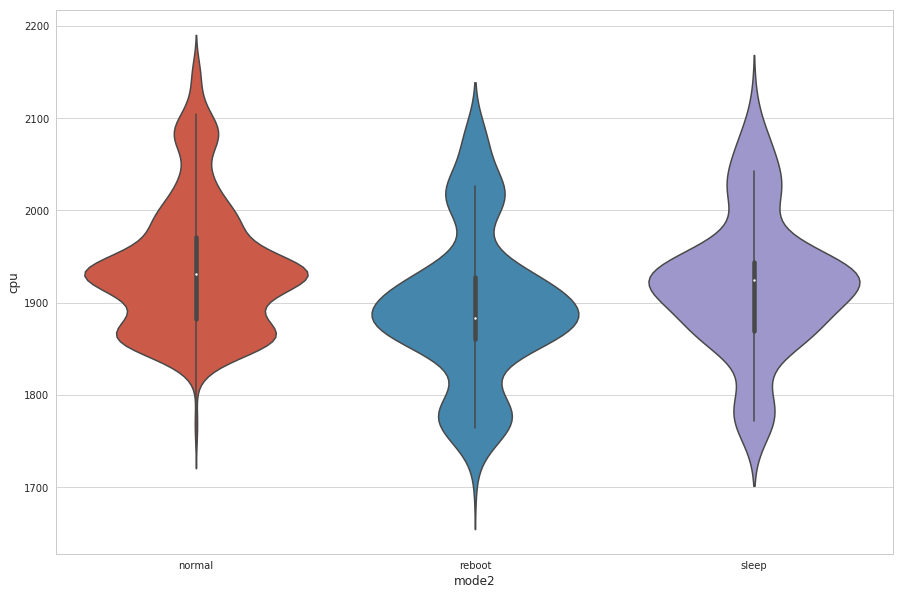

In [80]:
fig = plt.figure(figsize=(15,10))

sns.violinplot(data=energycg,x="mode2",y="cpu")


In [57]:
energylu.groupby("mode2").count()

,begin,end,sensor,cpu 0,cpu 1,dram 0,dram 1,cpu,dram,name,mode,benchmark,class,cpu number,p,number
mode2,,,,,,,,,,,,,,,,
normal,910,910,910,910,910,910,910,910,910,910,910,910,910,910,910,910
reboot,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
sleep,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130


In [73]:
def bootstrap(energy,groupbyobj="mode2",sampleSize=40): 
    l=[(energy.loc[energy[groupbyobj]==x ],x) for x in energy[groupbyobj].drop_duplicates() ]
#     l=[np.random.choice(x["cpu"], size=(5000, sampleSize))for x in l]
#     return l
    l=[(np.random.choice(i["cpu"], size=(5000, sampleSize)),j) for i,j in l ]
    l=[(np.std(i,1),j) for i,j in l]
    l2=[]
    for i,j in l:
        data=pd.DataFrame()
        data["val"]=i
        data[groupbyobj]=j
        l2.append(data)
    return l,pd.concat(l2)


# data["val"]=btdocker
# data["mode"]="docker"
# data2=pd.DataFrame()
# data2["val"]=btbinarry
# data2["mode"]="binarry"
#     return pd.concat(l)
e2,_=bootstrap(energycg)

In [127]:
import scipy as sc
# print("shapiro docker : "+str(sc.stats.shapiro(btdocker)))
# print("shapiro binarry : "+str(sc.stats.shapiro(btbinarry)))
# print("wilcoxon: "+str(sc.stats.wilcoxon(btdocker,btbinarry)))
print("mannwhitneyu: "+str(sc.stats.mannwhitneyu(btchetemi,btecotype,alternative="less")))
# print("t-test: "+str(sc.stats.ttest_ind(btbinarry,btdocker)))


mannwhitneyu: MannwhitneyuResult(statistic=24998817.0, pvalue=1.0)


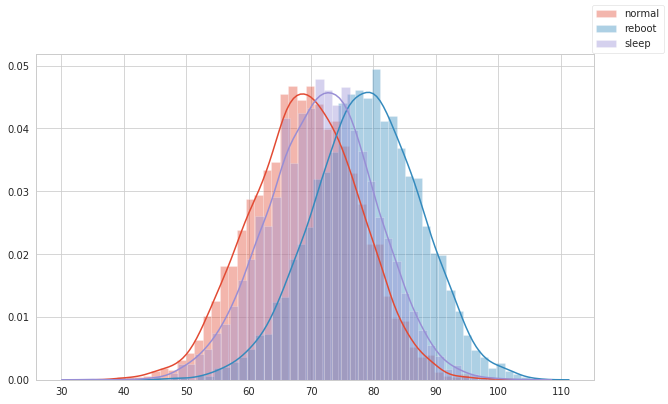

In [74]:
fig = plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
legends=[]
for i,j in e2: 
    sns.distplot(i,label=j)
    legends.append(j)
fig.legend(labels=legends)

plt.show()

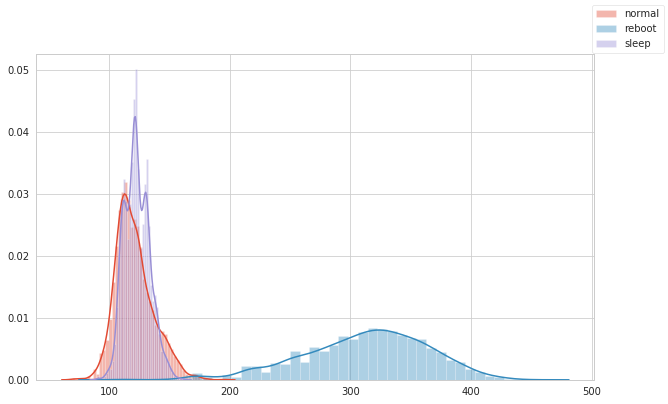

In [75]:
e3,_=bootstrap(energylu)
fig = plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
legends=[]
for i,j in e3: 
    sns.distplot(i,label=j)
    legends.append(j)
fig.legend(labels=legends)

plt.show()

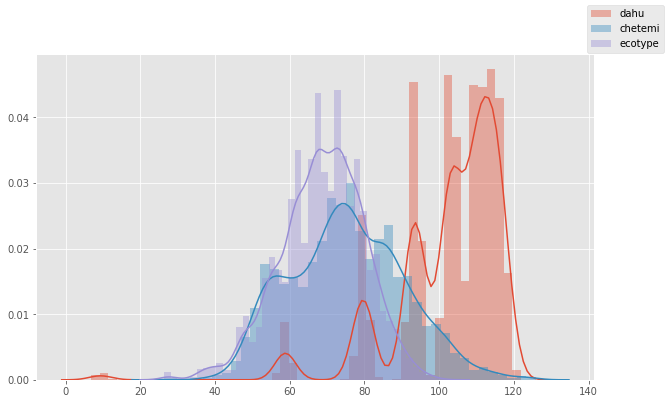

In [118]:
fig = plt.figure(figsize=(10,6))
sns.distplot(btdahu,label="dahu")
sns.distplot(btchetemi,label="chetemi")
sns.distplot(btecotype,label="ecotype")
fig.legend(labels=['dahu','chetemi',"ecotype"])
plt.show()

In [124]:
sampleSize=15
energylu=energy.loc[energy["benchmark"]=="CG"]
energy2=cleanData( energylu,groupobj="sensor",measure="cpu")

dahu = energy2.loc[energy2["sensor"]=="genxDahu2",["cpu"]]
chetemi=energy2.loc[energy2["sensor"]=="genxChetemi11",["cpu"]]
ecotype=energy2.loc[energy2["sensor"]=="genxEcotype5",["cpu"]]
np.random.seed=123444123
# print(meandocker)
# dockers["cpu"]=dockers.apply(lambda x: x["cpu"]-meandocker,axis=1)
# binarries["cpu"]=binarries.apply(lambda x : x["cpu"]-meanbinarry,axis=1)
# btdahu=sns.algorithms.bootstrap(dahu,n_boot=1000,func=len,seed=12344123)


show(dahu)
# btbinarry=sns.algorithms.bootstrap(binarries,n_boot=1000,func=np.std,seed=12344123)
btdahu= np.random.choice(dahu["cpu"], size=(5000, sampleSize))
btdahu=np.std(btdahu,1)

btchetemi= np.random.choice(chetemi["cpu"], size=(5000, sampleSize))
btchetemi=np.std(btchetemi,1)

btecotype= np.random.choice(ecotype["cpu"], size=(5000, sampleSize))
btecotype=np.std(btecotype,1)


# print(np.std(binaries))
# print(np.std(dockers))
# show(energy2)
# print("Docker: real value: {} , bt mean {}".format(np.std(dockers["cpu"]),np.mean(btdocker)))
# print("binarry:real value: {} , bt mean {}".format(np.std(binarries["cpu"]),np.mean(btbinarry)))
xtics=x = np.linspace(0, 1, len(btdahu))
# btdocker

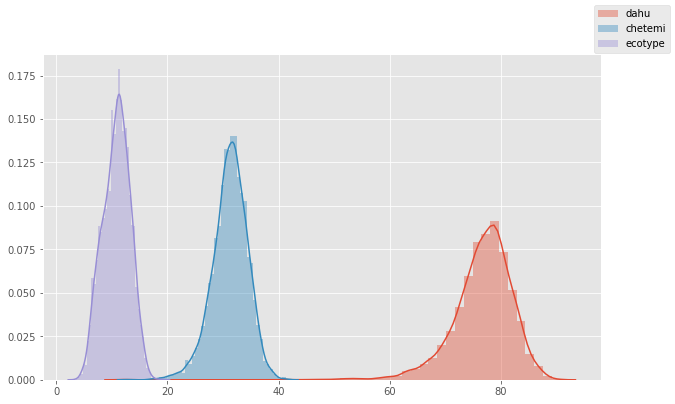

In [125]:
fig = plt.figure(figsize=(10,6))
sns.distplot(btdahu,label="dahu")
sns.distplot(btchetemi,label="chetemi")
sns.distplot(btecotype,label="ecotype")
fig.legend(labels=['dahu','chetemi',"ecotype"])
plt.show()

In [128]:
print("mannwhitneyu: "+str(sc.stats.mannwhitneyu(btchetemi,btecotype,alternative="greater")))

mannwhitneyu: MannwhitneyuResult(statistic=24998817.0, pvalue=0.0)


In [48]:
data=pd.DataFrame()
data["val"]=btdocker
data["mode"]="docker"
data2=pd.DataFrame()
data2["val"]=btbinarry
data2["mode"]="binarry"

data=pd.concat([data,data2])
# show(data)

Text(0.5, 1.0, 'energy variation , docker vs binarry')

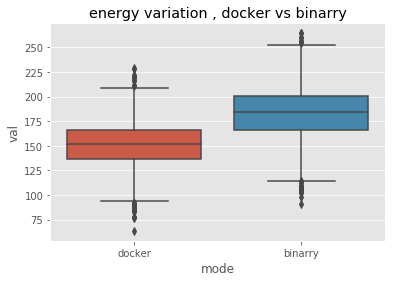

In [49]:
sns.boxplot(data=data,x="mode",y="val").set_title("energy variation , docker vs binarry")

In [ ]:
0664909870